## Otimização de projeto em engenharia mecânica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Função, gradiente e hessiana

* $f(x)$ - função a ser minimizada
* $\nabla f(x)$ - gradiente de $f(x)$
* $\nabla^2 f(x)$ - hessiana de $f(x)$

In [2]:
def func(x0):
    x1, x2 = x0[0],x0[1]
    return((1 - x1)**2 + 100* (x2 - x1**2)**2)

def grad(x0):
    x1, x2 = x0[0],x0[1]
    return(np.array([400*x1**3 - 400*x1*x2 +\
                     2*x1 - 2, 200*x2 -\
                     200*x1**2]).reshape((2,1)))

def hess(x0):
    x1, x2 = x0[0],x0[1]
    return(np.array([1200*x1**2 - 400*x2 + 2,
                    -400*x1, -400*x1,
                     200]).reshape((2,2)))

def direction(x0,flag,df=0,alpha=1,d2f=0):
    if flag == 0:
        d = -grad(x0).T
    elif flag == 1:
        df = grad(x0)
        if type(d2f) == int:
            d2f = -hess(x0)
        d = np.matmul(np.linalg.inv(d2f),df).T
    return(d)

def hess_num(x0,df,alpha,d,H=np.eye(2)):
    c = grad(x0 + alpha * d)
    y = c - df
    s = alpha * d
    D = np.matmul(y,y.T) / np.dot(y.T[0],s)
    E = np.matmul(c,c.T) / np.dot(c.T[0],d)
    return(H + D + E)    

#### Função teste

* Rosenbrock's banana function

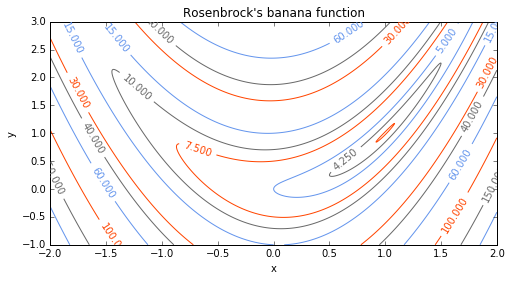

In [2]:
xx = np.linspace(-2,2,1000)
yy = np.linspace(-1,3,1000)
x1,x2 = np.meshgrid(xx,yy)
Z = 10*x1**4 - x2*20*x1**2 +\
           10*x2**2 + x1**2 -2*x1 + 5

levels = [4.007,4.25,5,7.5,10,15,30,40,60,100,150,200]
cors = ('#FF4500','#696969','#6495ED')*4
plt.figure(figsize=(8,4))
cp = plt.contour(x1,x2,Z,levels,colors=cors)
plt.clabel(cp, inline=True,fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock's banana function")

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1,x2,Z,rstride=1, cstride=1, cmap='viridis')#,
                       #linewidth=0, antialiased=False)

Algoritmo de minimização

In [3]:
epsilon = 1e-3
delf = 1
x0 = [1.5,-0.5]
f,df,d2f = func(x0), grad(x0), hess(x0)#np.eye(2)
print(np.linalg.norm(df))
x = x0
i,a = 0,0.5
xp,yp,fp = [x0[0]], [x0[1]], [f]

while np.linalg.norm(df) > epsilon and i < 500:
    d = direction(x,1,d2f=-d2f)
    if func(x + a*d[0]) < f:
        x = x + a*d[0]        
        f,df = func(x), grad(x)
        #d2f = hess(x)
        d2f = hess_num(x,df,a,d[0],d2f)
        d = np.matmul(-np.linalg.inv(d2f),df)
        xp.append(x[0]),yp.append(x[1])
        fp.append(f)
    if all(df == 0) and all(np.linalg.eigvals(d2f) > 0):
        print('x é minimizador')
        break
    i += 1
    #print(x,f,i,delf)
print(x,f,i,np.linalg.norm(df))

plt.figure(figsize=(10,5))
cp = plt.contour(x1,x2,Z,levels,colors=cors)
plt.plot(xp,yp,'ro')
plt.clabel(cp, inline=True,fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock's banana function")

NameError: name 'func' is not defined